### Import libraries
---

In [1]:
import pandas as pd 
import seaborn as sns

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration of the plots we will create

### Importing data of movie
---

In [2]:
# Read the data

df = pd.read_csv('/Users/david.davila.a/Documents/Data Science/Ejercicios/Projects/project_movies/Data/movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Cleaning data
---

In [3]:
### Looking for missing data
 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {:.3f}'.format(col, pct_missing))

name - 0.000
rating - 0.010
genre - 0.000
year - 0.000
released - 0.000
score - 0.000
votes - 0.000
director - 0.000
writer - 0.000
star - 0.000
country - 0.000
budget - 0.283
gross - 0.025
company - 0.002
runtime - 0.001


In [4]:
### Data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
### Converting type of data. float into int64

df['budget'] = df['budget'].astype('float64')

df['gross'] = df['gross'].astype('float64')

df['votes'] = df['votes'].astype('Int64')

df['company'] = df['company'].astype('str')

In [6]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
### Converting the column released as object into str.
### by using the comand str.split() we will be able to separate the string by space. Then we will call the comand .str[] to indicate the number of space that we want.

df['yearcorrect'] = df['released'].astype(str).str.split().str[2]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [8]:
df = df.sort_values(by = ['gross'], inplace = False , ascending = False)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,nan,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,<NA>,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,nan,120.0,2020


In [9]:
### Visualize all the rows:
# pd.set_option('display.max_rows',None)

### Drop any Duplicate
---

In [10]:
#df['company'].drop_duplicates().sort_values(ascending = False)
#df['company'].sort_values(ascending = False)

In [11]:
# Drop duplicates

df['company'].drop_duplicates().sort_values(ascending = False)

7129                                thefyzz
7657                                    nan
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
                       ...                 
5813                        10 West Studios
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 2386, dtype: object

### Correlations
---

In [12]:
# budget high correlation
# Company high correlation

Text(0, 0.5, 'Gross Movie in Billion Dollars')

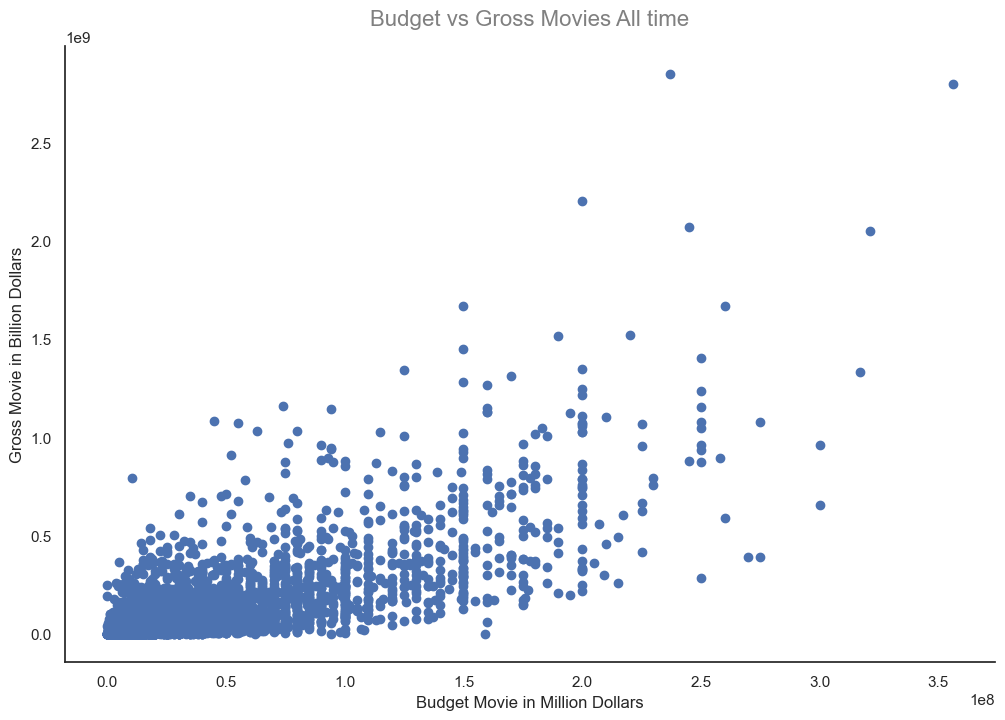

In [13]:
# Scatter plot with budget vs gross
custum_params = {"axes.spines.right":False, "axes.spines.bottom":True,
                 "axes.spines.left":True, "axes.spines.top":False}

sns.set_theme(rc = custum_params , context = "notebook", style = "white")

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Movies All time', fontsize = 16, pad = 15, color = 'grey')
plt.xlabel('Budget Movie in Million Dollars', fontsize = 12)
plt.ylabel('Gross Movie in Billion Dollars', fontsize = 12)


Text(0, 0.5, 'Gross Movie in Billion Dollars')

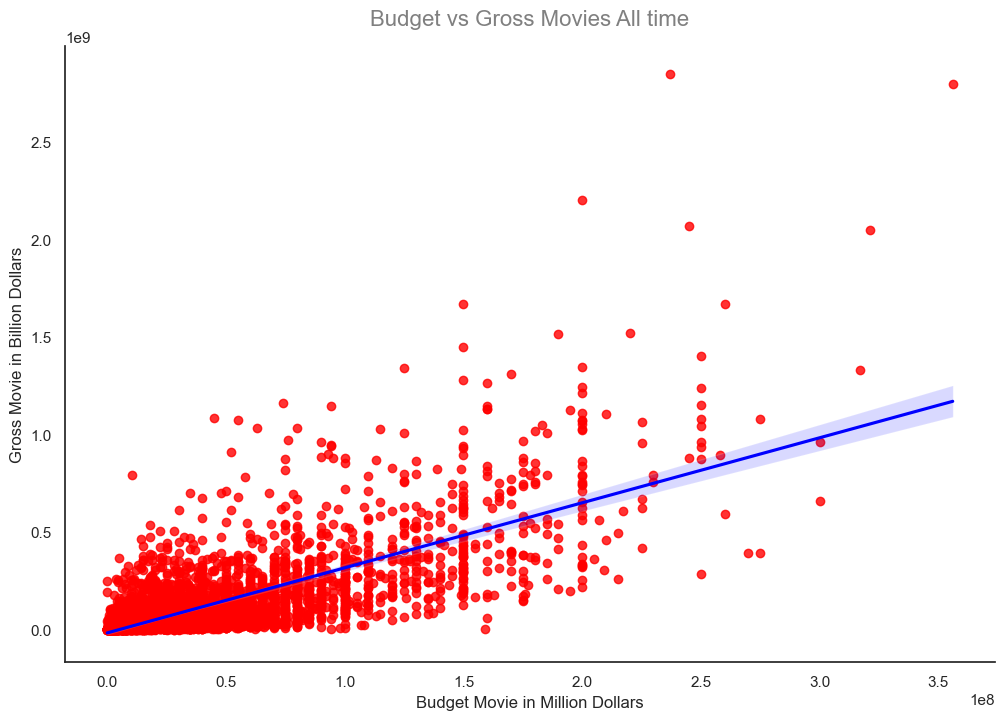

In [14]:
# Plot budget vs gross with seaborn

sns.regplot(x = df['budget'], y = df['gross'], data = df, scatter_kws = {'color':'red'},line_kws = {'color' : 'blue'})

plt.title('Budget vs Gross Movies All time', fontsize = 16, pad = 15, color = 'grey')
plt.xlabel('Budget Movie in Million Dollars', fontsize = 12)
plt.ylabel('Gross Movie in Billion Dollars', fontsize = 12)

In [15]:
# Let's take a view of the correlation:

# We will use Kendall method for this (Can be pearson, kendall, spearman)

df.corr(numeric_only=True, method = 'kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.224120,0.200618,0.097184
score,0.067652,1.000000,0.300115,-0.000566,0.086046,0.283611
votes,0.331465,0.300115,1.000000,0.353702,0.548899,0.198240
budget,0.224120,-0.000566,0.353702,1.000000,0.512637,0.235483
gross,0.200618,0.086046,0.548899,0.512637,1.000000,0.168933
runtime,0.097184,0.283611,0.198240,0.235483,0.168933,1.000000


Text(117.24999999999999, 0.5, 'Movie Features')

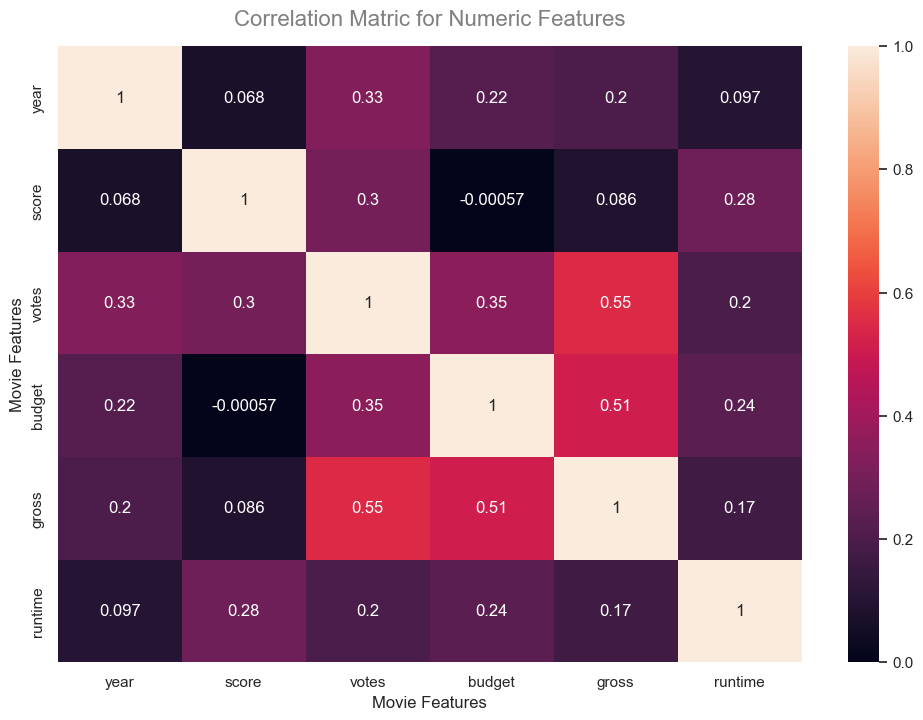

In [16]:
# high correlation between budget and gross it's correct.


correlation_matrix = df.corr(numeric_only = True , method = 'kendall')

sns.heatmap(data = correlation_matrix,annot = True)

plt.title('Correlation Matric for Numeric Features', fontsize = 16, pad = 15, color = 'grey')
plt.xlabel('Movie Features', fontsize = 12)
plt.ylabel('Movie Features', fontsize = 12)


In [17]:
# Look at company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018


In [18]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,nan,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,<NA>,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,nan,120.0,2020


In [19]:
# We are going to convert every str into a name to correlate topic for example like company with score.

df_numerized = pd.read_csv('/Users/david.davila.a/Documents/Data Science/Ejercicios/Projects/project_movies/Data/movies.csv')


df_numerized['budget'] = df_numerized['budget'].astype('float64')

df_numerized['gross'] = df_numerized['gross'].astype('float64')

df_numerized['votes'] = df_numerized['votes'].astype('Int64')

df_numerized['company'] = df_numerized['company'].astype('str')


df_numerized['yearcorrect'] = df_numerized['released'].astype(str).str.split().str[2]



for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.sort_values(by = ['gross'], inplace = False , ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,31
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,41
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,19
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,37
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18,1500,2289,2421,55,7000.0,NaN,2384,90.0,42
7664,1678,-1,4,2020,1107,4.7,36,774,2614,1886,55,NaN,NaN,539,90.0,42
7665,4717,-1,6,2020,193,5.7,29,2061,2683,2040,55,58750.0,NaN,941,NaN,42
7666,2843,-1,6,2020,2817,NaN,<NA>,1184,1824,450,55,15000.0,NaN,2384,120.0,42


In [20]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,nan,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,<NA>,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,nan,120.0,2020


Text(117.24999999999999, 0.5, 'Movie Features')

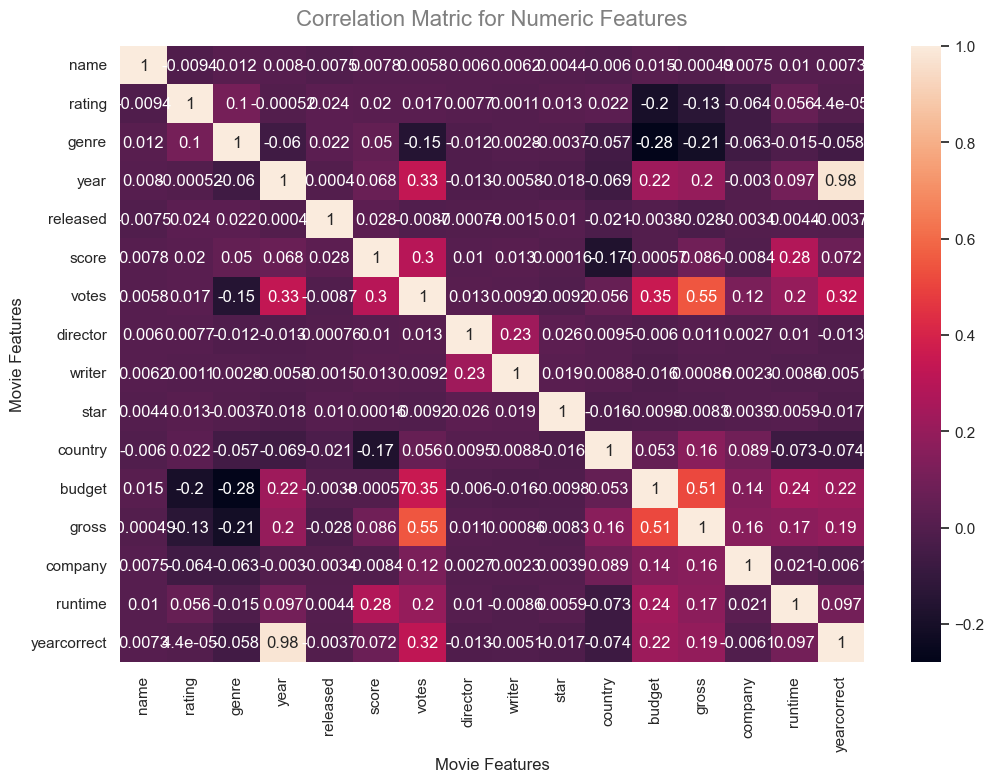

In [21]:
correlation_matrix_codes = df_numerized.corr(numeric_only = True , method = 'kendall')

sns.heatmap(data = correlation_matrix_codes,annot = True)

plt.title('Correlation Matric for Numeric Features', fontsize = 16, pad = 15, color = 'grey')
plt.xlabel('Movie Features', fontsize = 12)
plt.ylabel('Movie Features', fontsize = 12)

In [22]:
correlation_matrix_codes 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.009373,0.011615,0.007957,-0.007514,0.007769,0.005842,0.005961,0.006196,0.004366,-0.005985,0.014819,-0.000495,0.007528,0.010191,0.007287
rating,-0.009373,1.000000,0.100890,-0.000516,0.023896,0.019863,0.017004,0.007735,0.001079,0.013431,0.022408,-0.198859,-0.134830,-0.063643,0.055823,0.000044
genre,0.011615,0.100890,1.000000,-0.059866,0.021527,0.049721,-0.149969,-0.012338,0.002779,-0.003664,-0.056763,-0.278966,-0.210893,-0.063104,-0.015251,-0.057786
year,0.007957,-0.000516,-0.059866,1.000000,0.000399,0.067652,0.331465,-0.013311,-0.005800,-0.018181,-0.068822,0.224120,0.200618,-0.003045,0.097184,0.979910
released,-0.007514,0.023896,0.021527,0.000399,1.000000,0.027612,-0.008681,-0.000762,-0.001510,0.010395,-0.020635,-0.003801,-0.028470,-0.003394,0.004405,-0.003689
score,0.007769,0.019863,0.049721,0.067652,0.027612,1.000000,0.300115,0.010082,0.013060,0.000163,-0.172293,-0.000566,0.086046,-0.008391,0.283611,0.071516
votes,0.005842,0.017004,-0.149969,0.331465,-0.008681,0.300115,1.000000,0.012942,0.009177,-0.009153,0.056417,0.353702,0.548899,0.119424,0.198240,0.324984
director,0.005961,0.007735,-0.012338,-0.013311,-0.000762,0.010082,0.012942,1.000000,0.227312,0.026451,0.009532,-0.006020,0.010520,0.002700,0.010240,-0.012723
writer,0.006196,0.001079,0.002779,-0.005800,-0.001510,0.013060,0.009177,0.227312,1.000000,0.018635,0.008789,-0.015664,0.000855,0.002264,-0.008642,-0.005123
star,0.004366,0.013431,-0.003664,-0.018181,0.010395,0.000163,-0.009153,0.026451,0.018635,1.000000,-0.016154,-0.009778,-0.008320,0.003865,0.005899,-0.017075


In [23]:
corr_pairs = correlation_matrix_codes.unstack()
corr_pairs

name         name           1.000000
             rating        -0.009373
             genre          0.011615
             year           0.007957
             released      -0.007514
                              ...   
yearcorrect  budget         0.217510
             gross          0.193361
             company       -0.006126
             runtime        0.097109
             yearcorrect    1.000000
Length: 256, dtype: float64

In [24]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.278966
budget       genre         -0.278966
gross        genre         -0.210893
genre        gross         -0.210893
budget       rating        -0.198859
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [25]:
high_correlation = sorted_pairs[(sorted_pairs) > 0.5]
high_correlation

budget       gross          0.512637
gross        budget         0.512637
             votes          0.548899
votes        gross          0.548899
yearcorrect  year           0.979910
year         yearcorrect    0.979910
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [26]:
df_2019 = df[df['yearcorrect']== '2019']
df_2019

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000.0,1.670728e+09,Walt Disney Pictures,118.0,2019
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000.0,1.450027e+09,Walt Disney Animation Studios,103.0,2019
7458,Spider-Man: Far from Home,PG-13,Action,2019,"July 2, 2019 (United States)",7.5,359000,Jon Watts,Chris McKenna,Tom Holland,United States,160000000.0,1.131928e+09,Columbia Pictures,129.0,2019
7456,Captain Marvel,PG-13,Action,2019,"March 8, 2019 (United States)",6.8,478000,Anna Boden,Anna Boden,Brie Larson,United States,160000000.0,1.128463e+09,Walt Disney Pictures,123.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7610,Body at Brighton Rock,R,Horror,2019,"April 26, 2019 (United States)",4.8,1900,Roxanne Benjamin,Roxanne Benjamin,Karina Fontes,United States,NaN,5.123000e+03,Protostar Pictures,87.0,2019
7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5.7,320,Shane Stanley,Lee Stanley,Miko Hughes,United States,NaN,7.900000e+02,Visual Arts Entertainment,104.0,2019
7562,The Fanatic,R,Crime,2019,"August 30, 2019 (Mexico)",4.1,7900,Fred Durst,Fred Durst,John Travolta,United States,18000000.0,NaN,Daniel Grodnik Productions,88.0,2019
7567,Sunrise in Heaven,Not Rated,Drama,2019,"April 9, 2019 (United States)",6.0,871,Waymon Boone,Dan Benamor,Caylee Cowan,United States,1100000.0,NaN,Nasser Group,85.0,2019


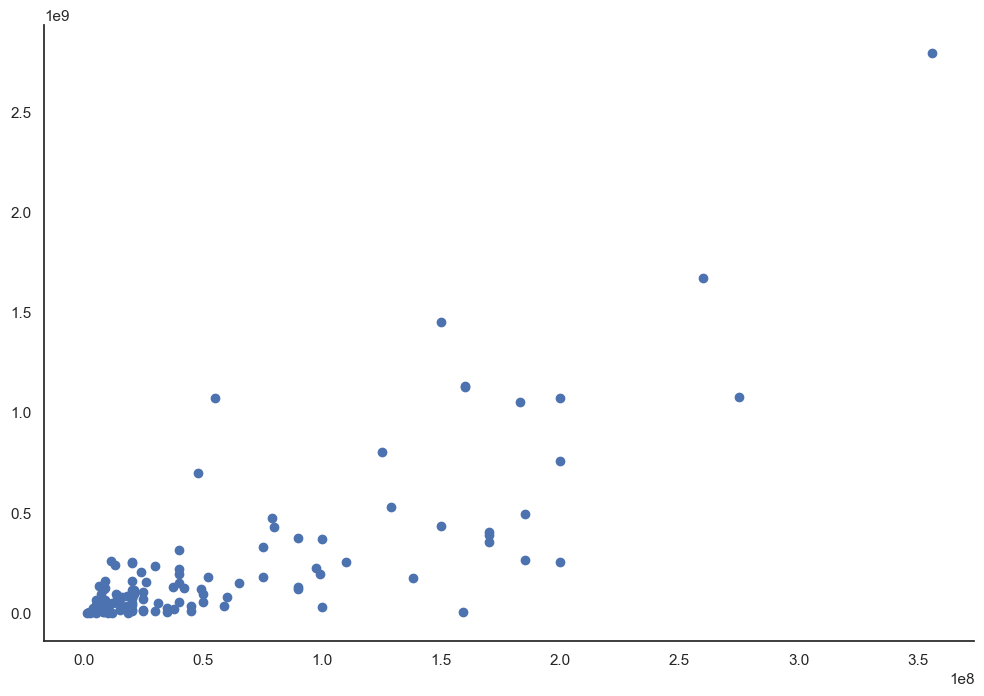

In [27]:
custum_params = {"axes.spines.right":False, "axes.spines.bottom":True,
                 "axes.spines.left":True, "axes.spines.top":False}

sns.set_theme(rc = custum_params , context = "notebook", style = "white")

plt.scatter(x = df_2019['budget'], y = df_2019['gross'])

In [28]:
df_2019 = df_2019.sort_values(by ='gross', inplace=False, ascending=False)
df_2019

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000.0,1.670728e+09,Walt Disney Pictures,118.0,2019
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000.0,1.450027e+09,Walt Disney Animation Studios,103.0,2019
7458,Spider-Man: Far from Home,PG-13,Action,2019,"July 2, 2019 (United States)",7.5,359000,Jon Watts,Chris McKenna,Tom Holland,United States,160000000.0,1.131928e+09,Columbia Pictures,129.0,2019
7456,Captain Marvel,PG-13,Action,2019,"March 8, 2019 (United States)",6.8,478000,Anna Boden,Anna Boden,Brie Larson,United States,160000000.0,1.128463e+09,Walt Disney Pictures,123.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7610,Body at Brighton Rock,R,Horror,2019,"April 26, 2019 (United States)",4.8,1900,Roxanne Benjamin,Roxanne Benjamin,Karina Fontes,United States,NaN,5.123000e+03,Protostar Pictures,87.0,2019
7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5.7,320,Shane Stanley,Lee Stanley,Miko Hughes,United States,NaN,7.900000e+02,Visual Arts Entertainment,104.0,2019
7562,The Fanatic,R,Crime,2019,"August 30, 2019 (Mexico)",4.1,7900,Fred Durst,Fred Durst,John Travolta,United States,18000000.0,NaN,Daniel Grodnik Productions,88.0,2019
7567,Sunrise in Heaven,Not Rated,Drama,2019,"April 9, 2019 (United States)",6.0,871,Waymon Boone,Dan Benamor,Caylee Cowan,United States,1100000.0,NaN,Nasser Group,85.0,2019
